# Homework 4 

1. Acquire power data (https://www.bmreports.com/bmrs/?q=demand/rollingsystemdemand/historic) for 7 days (Include each day of the week)

1. Create two bar graphs of the power consumption per hour.

    * One bar graph has 24 bars showing the average consumption
    * One bar graph has 7x24 bars showing the average demand 

1. Your solution should be committed in your Week04 folder.

Graphs must have appropriate labels and there should not be anything extra cluttering. 

In [23]:
import pandas
from pandas import DataFrame
import csv
import math
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [4]:
#!head /Users/poojaanil/Desktop/RollingSystemDemand_20220224_1705.csv

In [14]:
dataframe = pandas.read_csv("/Users/poojaanil/Desktop/RollingSystemDemand_20220224_1705.csv", names = ['VD', 'measurement_time', 'demand_level'], parse_dates = [1], skiprows = 1)

In [15]:
dataframe

,VD,measurement_time,demand_level
0,VD,2022-02-01 00:00:00,25232.0
1,VD,2022-02-01 00:05:00,25363.0
2,VD,2022-02-01 00:10:00,25400.0
3,VD,2022-02-01 00:15:00,25529.0
4,VD,2022-02-01 00:20:00,25531.0
...,...,...,...
1996,VD,2022-02-07 22:20:00,30129.0
1997,VD,2022-02-07 22:25:00,29486.0
1998,VD,2022-02-07 22:30:00,29097.0
1999,VD,2022-02-07 22:35:00,28965.0


In [16]:
dataframe['measurement_time'] = dataframe['measurement_time'].apply(lambda x : pd.to_datetime(str(x)))

In [17]:
dataframe['Time'] = dataframe['measurement_time'].dt.time
dataframe['Hour'] = dataframe['measurement_time'].dt.hour
dataframe['Min'] = dataframe['measurement_time'].dt.minute
dataframe['Date'] = dataframe['measurement_time'].dt.date

In [18]:
dataframe

,VD,measurement_time,demand_level,Time,Hour,Min,Date
0,VD,2022-02-01 00:00:00,25232.0,00:00:00,0,0,2022-02-01
1,VD,2022-02-01 00:05:00,25363.0,00:05:00,0,5,2022-02-01
2,VD,2022-02-01 00:10:00,25400.0,00:10:00,0,10,2022-02-01
3,VD,2022-02-01 00:15:00,25529.0,00:15:00,0,15,2022-02-01
4,VD,2022-02-01 00:20:00,25531.0,00:20:00,0,20,2022-02-01
...,...,...,...,...,...,...,...
1996,VD,2022-02-07 22:20:00,30129.0,22:20:00,22,20,2022-02-07
1997,VD,2022-02-07 22:25:00,29486.0,22:25:00,22,25,2022-02-07
1998,VD,2022-02-07 22:30:00,29097.0,22:30:00,22,30,2022-02-07
1999,VD,2022-02-07 22:35:00,28965.0,22:35:00,22,35,2022-02-07


In [19]:
#Get demand level for each hour

every_hour = dataframe.groupby(['Hour']).agg({'demand_level' : 'mean'})
every_hour

,demand_level
Hour,
0,26092.678571
1,26159.428571
2,25878.047619
3,25425.988095
4,25130.095238
5,25888.190476
6,29030.404762
7,32914.000000
8,34861.690476


GRAPH FOR 24HR DATA

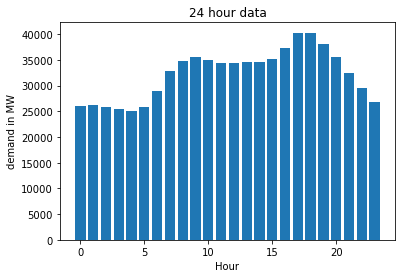

In [24]:
plt.bar(every_hour.index, every_hour.demand_level)
plt.xlabel('Hour')
plt.ylabel('demand in MW')
plt.title('24 hour data')
plt.show()

In [26]:
#Get mean of deman levels for 7 days by grouping with each day and its each hour.
get_day = dataframe.groupby(['Date', 'Hour']).agg({'demand_level' : 'mean'})


In [27]:
get_day.dropna(inplace=True)

In [28]:
get_day

demand_level
Date       Hour              
2022-02-01 0     25654.333333
           1     26147.916667
           2     26174.333333
           3     25789.333333
           4     26057.166667
...                       ...
2022-02-07 18    42909.416667
           19    40275.500000
           20    37034.333333
           21    33609.416667
           22    30247.875000

[167 rows x 1 columns]

GET 24*7 DAYS DATA

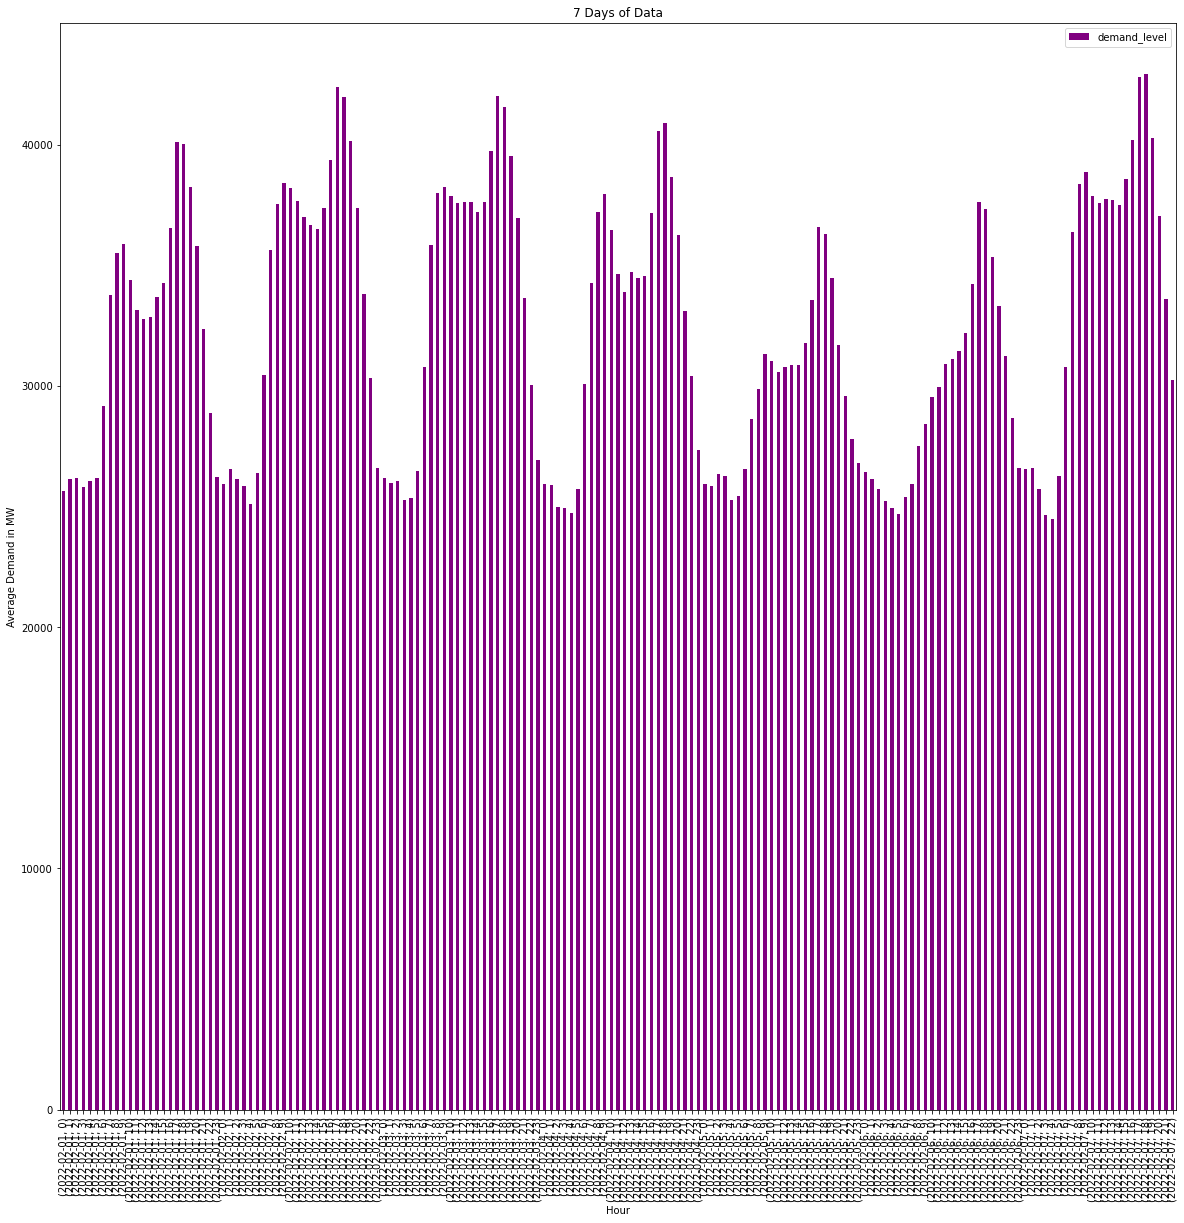

In [31]:

get_day.plot(kind = 'bar', xlabel = 'Hour', ylabel = 'Average Demand in MW', color = ['purple'], figsize = (20, 20))
plt.title('7 Days of Data')
plt.show()

